In [1]:
from data_loader import load_data, load_data_sample
from models import LogisticLogOddsModel
from explainers import SHAPExplainer
from util import printmd
import shap
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import sklearn
import numpy as np

In [2]:
%matplotlib inline

In [3]:
X, y, display_data = load_data()
feature_names = list(X.columns)
model = LogisticLogOddsModel()
model.load_or_train(X, y)

Loaded model: models/Logistic.model


In [4]:
X_sample, y_sample, display_data_sample = load_data_sample()
masker = shap.maskers.Independent(X_sample, max_samples=100)

In [5]:
permutation_explainer = shap.Explainer(model.predict, masker, algorithm='permutation')
permutation_explainer_shap_values = permutation_explainer(X_sample)
permutation_explainer_shap_values.display_data = display_data_sample

divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
divide by zero encountered in log
Permutation explainer: 1001it [00:30, 23.85it/s]                          


In [6]:
linear_explainer = shap.Explainer(model.model, masker, algorithm='linear')
linear_explainer_shap_values = linear_explainer(X_sample)
linear_explainer_shap_values.display_data = display_data_sample

In [7]:
exact_explainer = shap.Explainer(model.predict, masker, algorithm='exact')
exact_explainer_shap_values = exact_explainer(X_sample)
exact_explainer_shap_values.display_data = display_data_sample

divide by zero encountered in log
Exact explainer: 1001it [00:51, 15.69it/s]                          


In [8]:
explainers = [
    SHAPExplainer(permutation_explainer, 'Permutation', permutation_explainer_shap_values),
    SHAPExplainer(linear_explainer, 'Linear', linear_explainer_shap_values),
    SHAPExplainer(exact_explainer, 'Exact', exact_explainer_shap_values)]

In [40]:
include_ids = set(range(0, len(y_sample)))
for explainer in explainers:
    df = pd.DataFrame(explainer.shap_values.values)
    explainer_include = np.isfinite(df).all(1)
    for exclude_id in explainer_include[explainer_include == False].index:
        printmd(f'##### {explainer.identifier}/#{exclude_id} has non-finite SHAP-values:')
        print(pd.DataFrame(explainer.shap_values[exclude_id].display_data, index=feature_names))
        print(pd.DataFrame(explainer.shap_values[exclude_id].values, index=feature_names))
    explainer_include_ids = set(explainer_include[explainer_include == True].index.to_list())
    include_ids = include_ids & explainer_include_ids


##### Permutation/#139 has non-finite SHAP-values:

                                  0
Age                              41
Workclass              Self-emp-inc
Education-Num                    16
Marital Status   Married-civ-spouse
Occupation           Prof-specialty
Relationship                Husband
Race                          White
Sex                            Male
Capital Gain                  99999
Capital Loss                      0
Hours per week                   70
Country               United-States
                        0
Age              0.093389
Workclass       -0.023774
Education-Num         inf
Marital Status   0.106710
Occupation            NaN
Relationship          NaN
Race             0.034810
Sex              0.174150
Capital Gain    32.594624
Capital Loss         -inf
Hours per week        inf
Country          0.027391


##### Exact/#139 has non-finite SHAP-values:

                                  0
Age                              41
Workclass              Self-emp-inc
Education-Num                    16
Marital Status   Married-civ-spouse
Occupation           Prof-specialty
Relationship                Husband
Race                          White
Sex                            Male
Capital Gain                  99999
Capital Loss                      0
Hours per week                   70
Country               United-States
                  0
Age            -inf
Workclass       NaN
Education-Num   inf
Marital Status  NaN
Occupation      NaN
Relationship    NaN
Race            NaN
Sex             NaN
Capital Gain    inf
Capital Loss   -inf
Hours per week  inf
Country         NaN


In [46]:
for explainer in explainers:
    explainer.shap_values = explainer.shap_values[list(include_ids)]

In [47]:
def scatter_plot(feature_name):
    printmd(f'### {feature_name}')
    for explainer in explainers:
        shap.plots.scatter(explainer.shap_values[:, feature_name], color=explainer.shap_values, title=explainer.identifier)

### Age

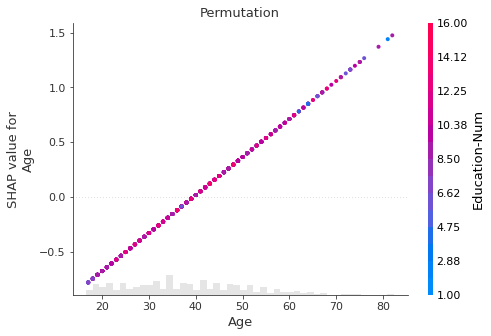

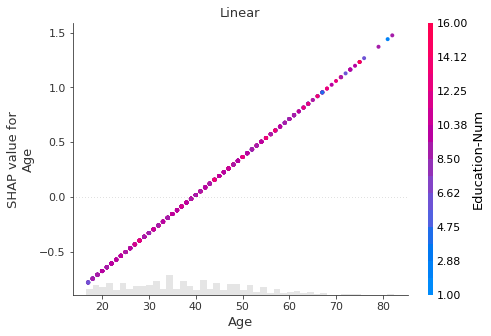

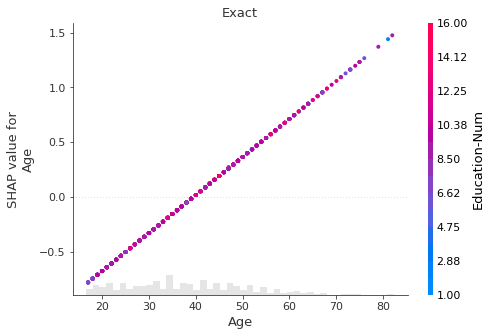

In [48]:
scatter_plot('Age')

### Workclass

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


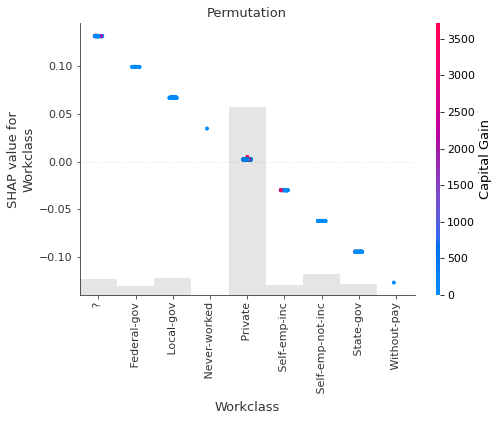

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


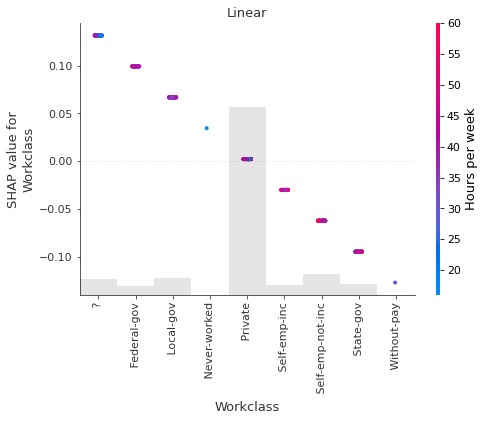

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


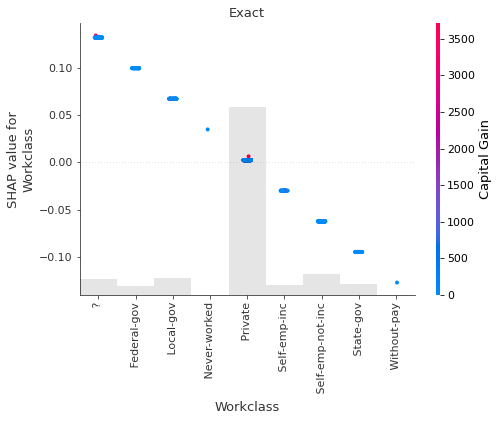

In [49]:
scatter_plot('Workclass')

### Education-Num

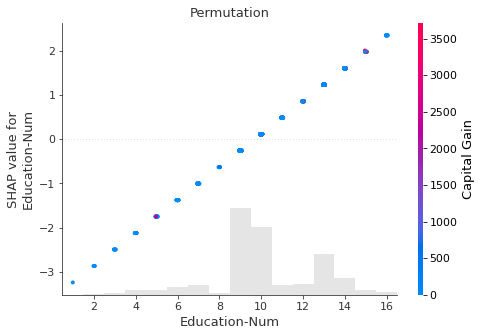

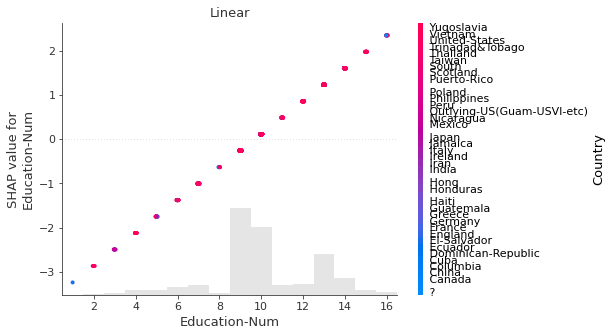

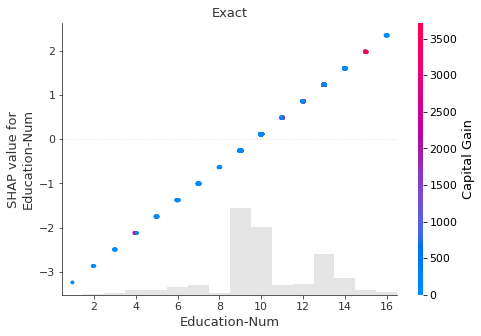

In [50]:
scatter_plot('Education-Num')

### Marital Status

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


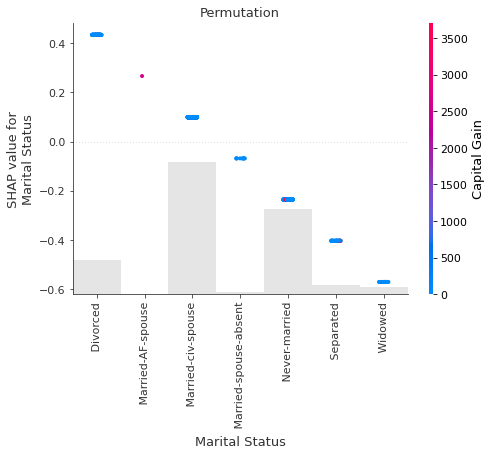

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


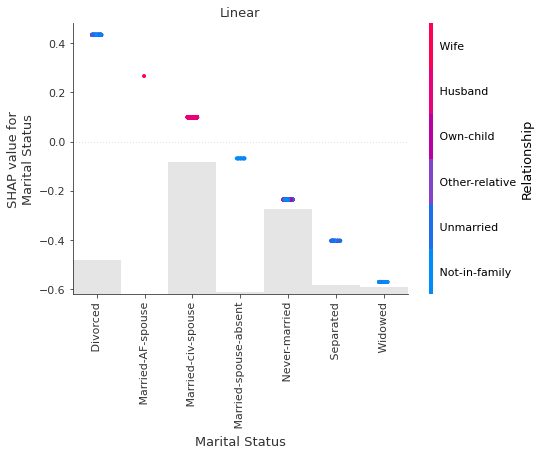

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


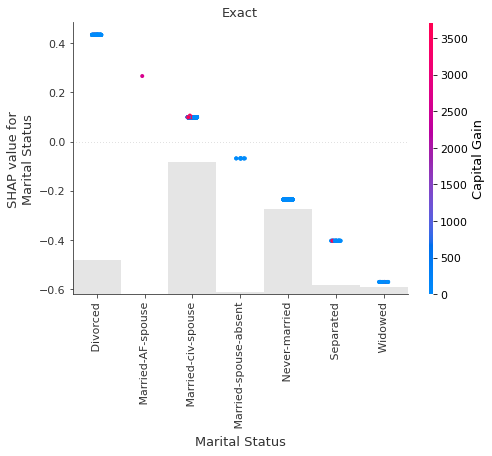

In [51]:
scatter_plot('Marital Status')

### Occupation

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


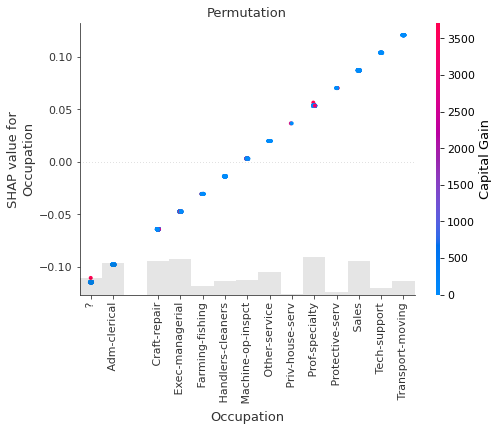

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


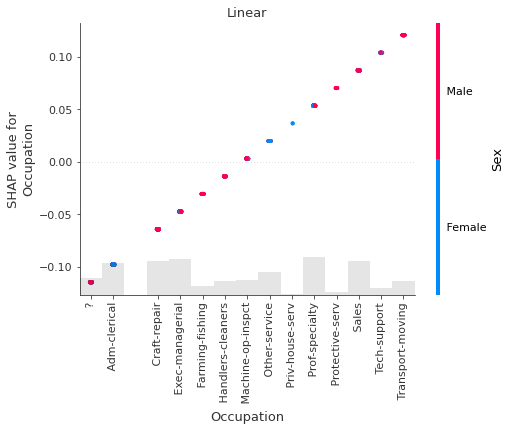

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


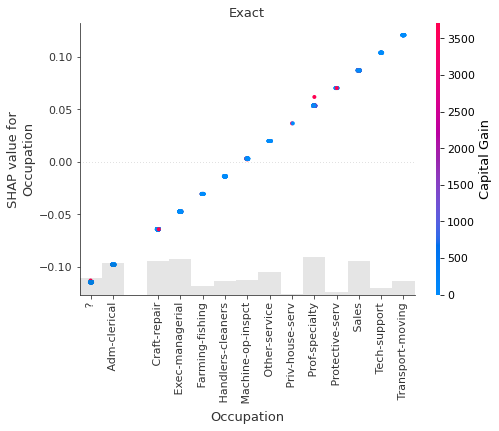

In [52]:
scatter_plot('Occupation')

### Relationship

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


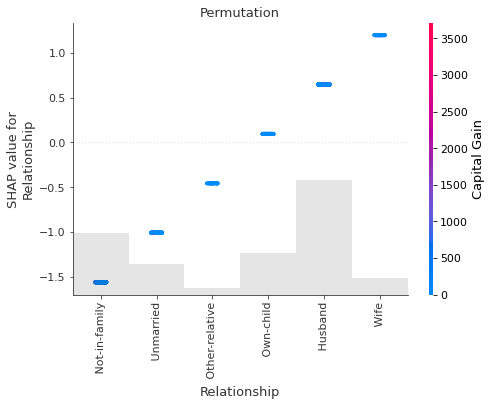

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


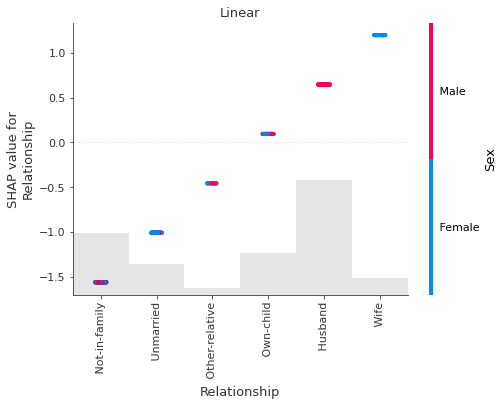

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


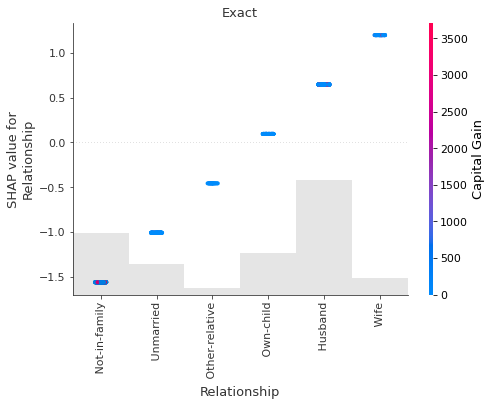

In [53]:
scatter_plot('Relationship')

### Race

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


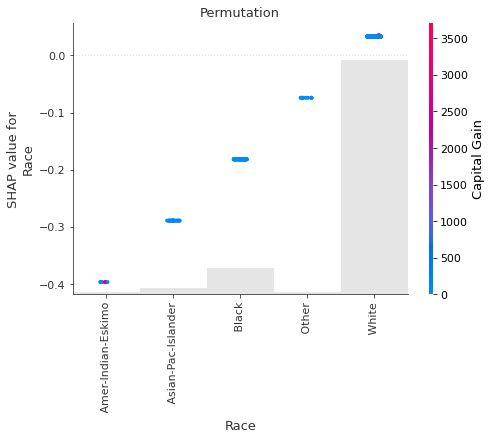

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


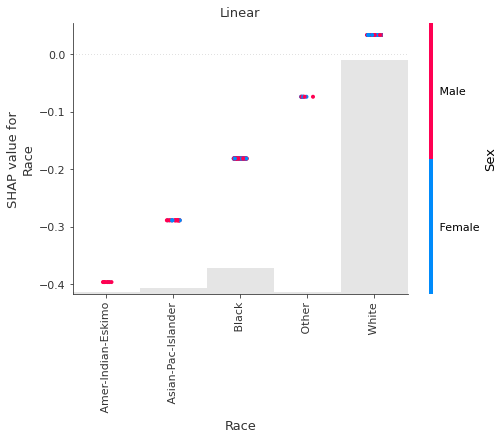

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


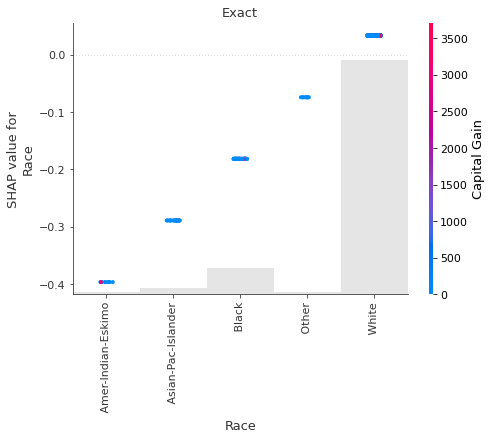

In [54]:
scatter_plot('Race')

### Sex

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


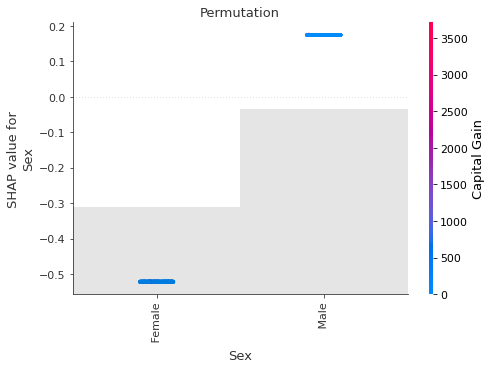

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


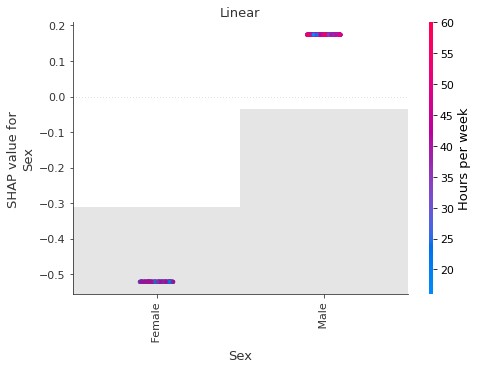

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


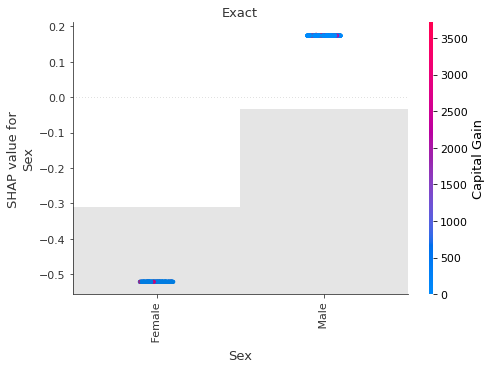

In [55]:
scatter_plot('Sex')

### Capital Gain

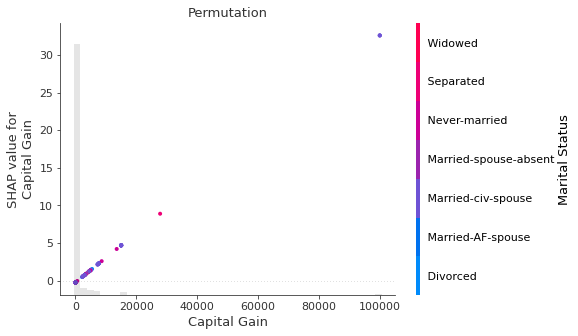

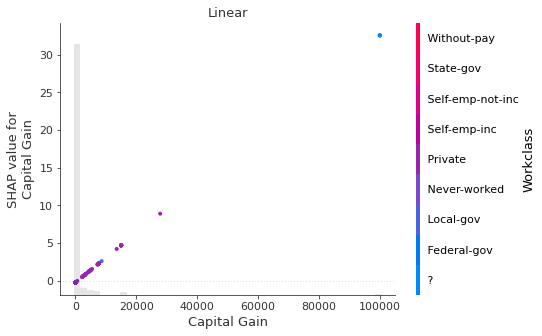

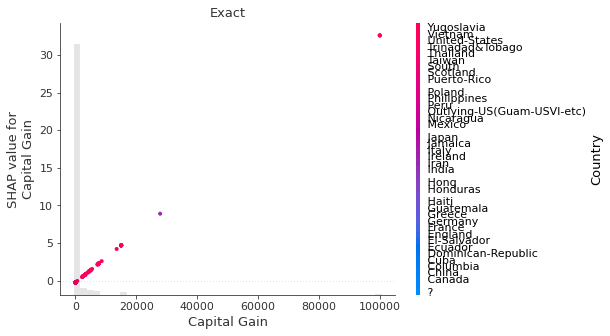

In [56]:
scatter_plot('Capital Gain')

### Capital Loss

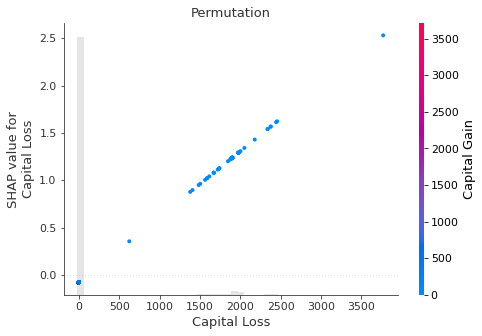

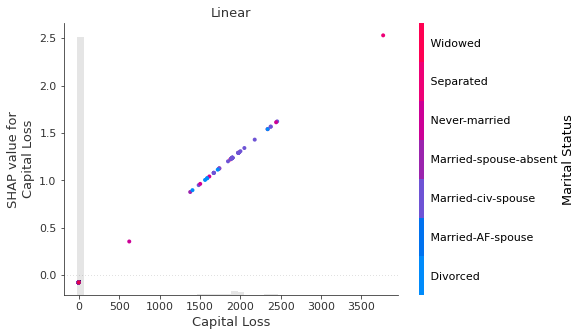

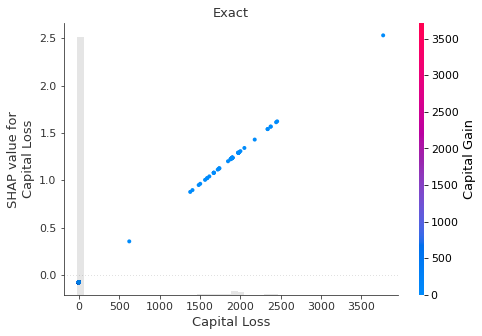

In [57]:
scatter_plot('Capital Loss')

### Hours per week

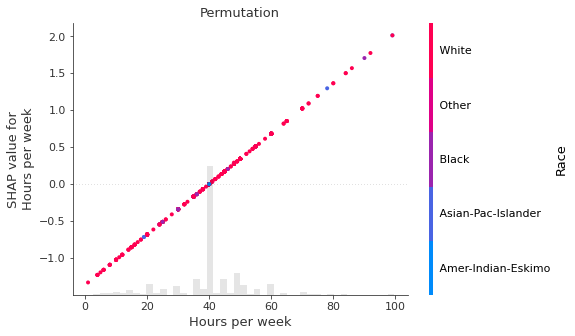

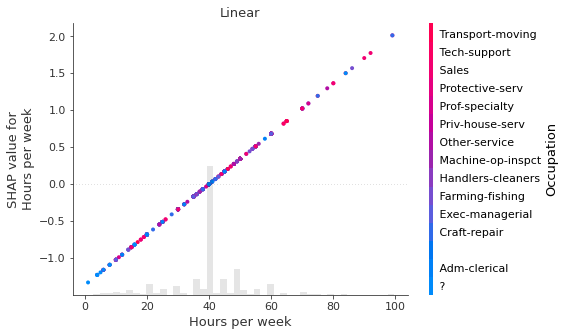

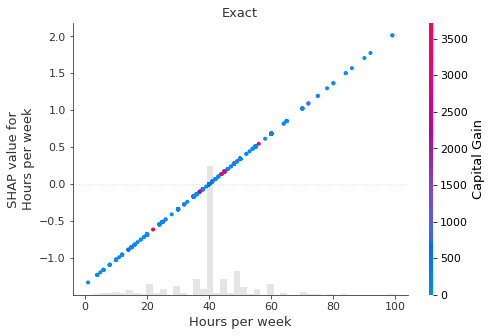

In [58]:
scatter_plot('Hours per week')

### Country

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


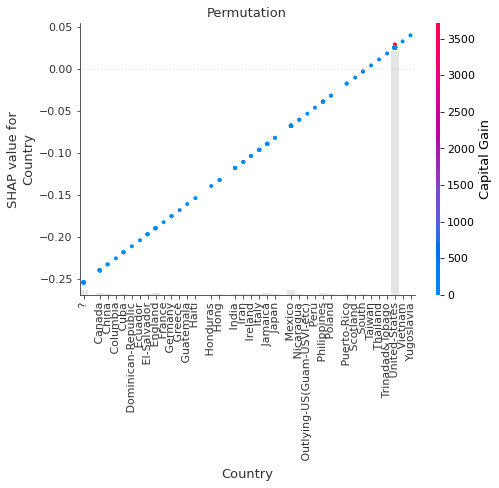

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


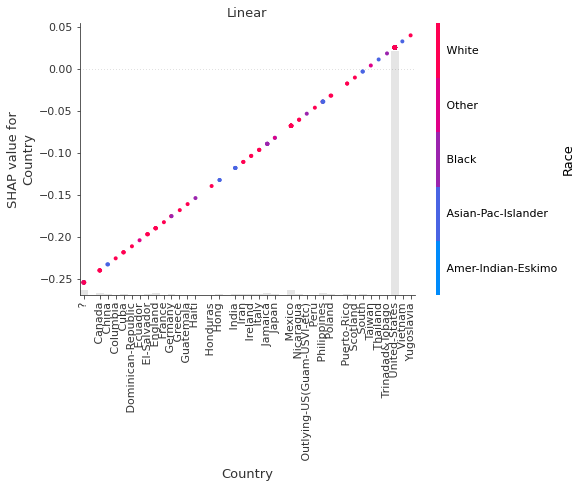

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


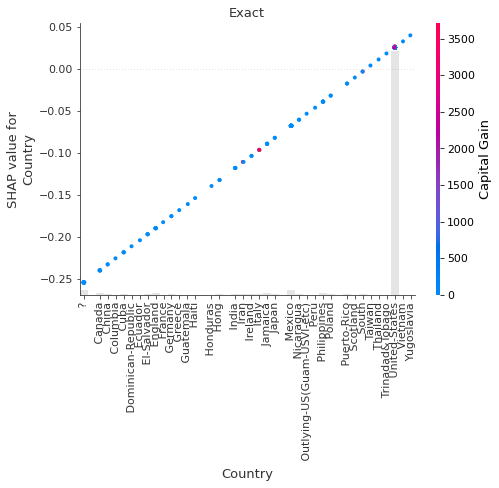

In [59]:
scatter_plot('Country')

### Permutation

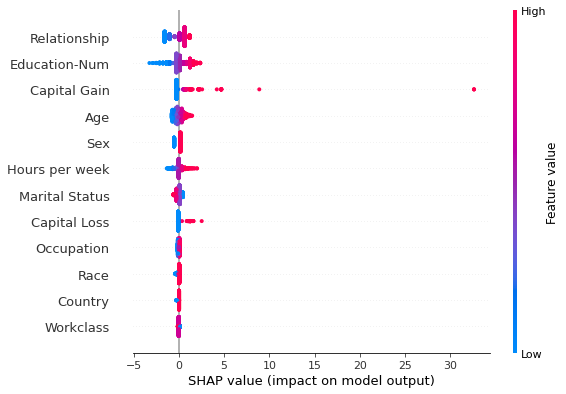

### Linear

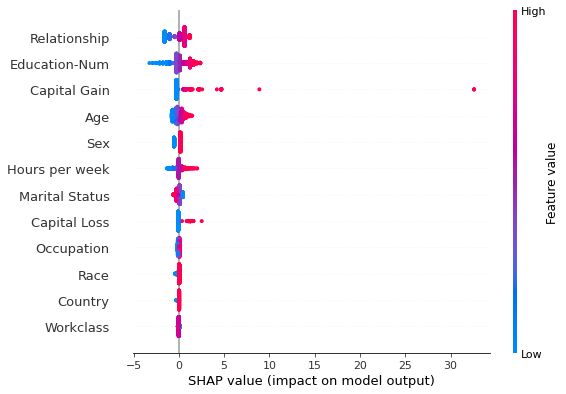

### Exact

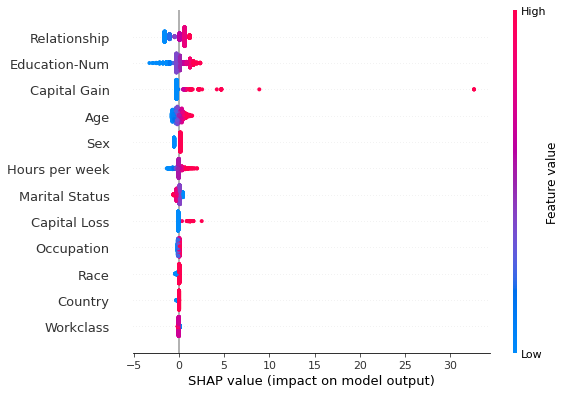

In [60]:
order = np.argsort(-explainers[-1].shap_values.abs.mean(0).values)
for explainer in explainers:
    printmd(f'### {explainer.identifier}')
    shap.plots.beeswarm(explainer.shap_values, order=order, max_display=len(feature_names))

In [61]:
shap.initjs()

In [62]:
last_explainer = explainers[-1]
last_plot = shap.plots.force(
    base_value=last_explainer.shap_values.abs.mean(0).base_values,
    shap_values=last_explainer.shap_values.values,
    features=last_explainer.shap_values.display_data,
    feature_names=feature_names,
    out_names=last_explainer.identifier)
ordering = list(map(lambda x: int(x['simIndex']), last_plot.data['explanations']))

In [63]:
def force_plot(explainer):
    printmd(f'### {explainer.identifier}')
    return shap.plots.force(
        base_value=explainer.shap_values.abs.mean(0).base_values,
        shap_values=explainer.shap_values.values,
        features=explainer.shap_values.display_data,
        feature_names=feature_names,
        out_names=explainer.identifier,
        ordering_keys=ordering)

In [64]:
force_plot(explainers[0])

### Permutation

In [65]:
force_plot(explainers[1])

### Linear

In [66]:
force_plot(explainers[2])

### Exact

### Permutation

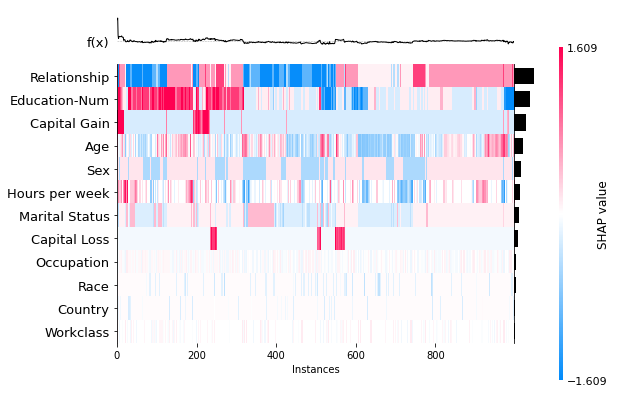

### Linear

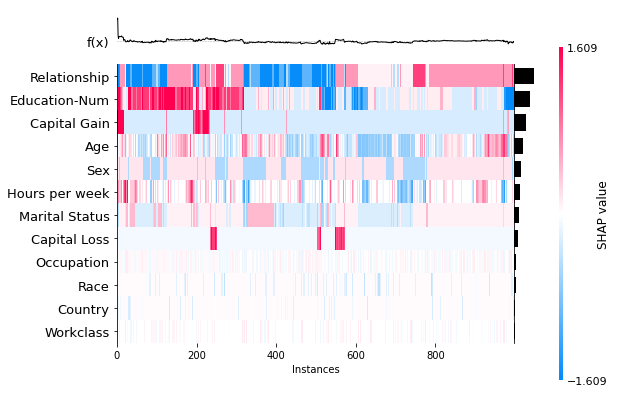

### Exact

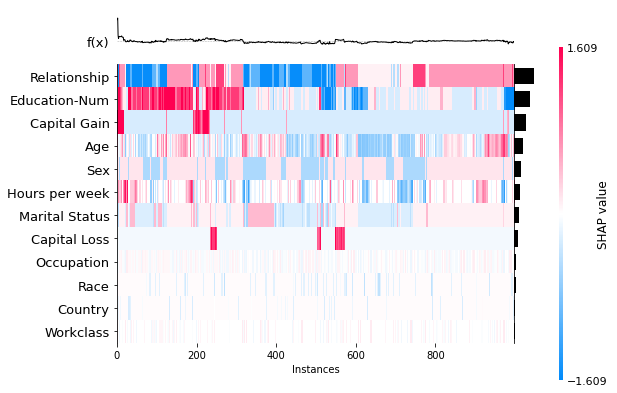

In [67]:
instance_order = last_explainer.shap_values.hclust()
feature_order = np.argsort(-last_explainer.shap_values.abs.mean(0).values)
for explainer in explainers:
    printmd(f'### {explainer.identifier}')
    shap.plots.heatmap(explainer.shap_values, instance_order=instance_order, feature_order=feature_order, max_display=len(feature_names))